In [1]:
%matplotlib inline

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import applications
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

from scipy import ndimage
from matplotlib.pyplot import imshow
from PIL import Image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [2]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

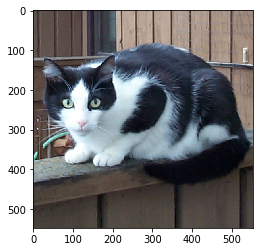

In [3]:
img = Image.open('data/cat.jpg')
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
img = img.crop((x, y, s, s))
imshow(np.asarray(img))

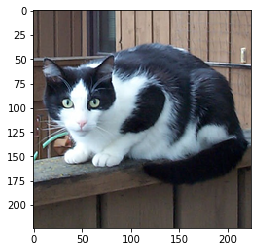

In [4]:
target_size = max(x for x in model.input_shape if x)
img = img.resize((target_size, target_size), Image.ANTIALIAS)
imshow(np.asarray(img))

In [5]:
np_img = image.img_to_array(img)
img_batch = np.expand_dims(np_img, axis=0)
pre_processed = preprocess_input(img_batch)
pre_processed.shape

(1, 224, 224, 3)

In [6]:
features = model.predict(pre_processed)
features.shape

(1, 1000)

In [7]:
decode_predictions(features, top=5)

[[('n02124075', 'Egyptian_cat', 0.14703201),
  ('n04040759', 'radiator', 0.12125659),
  ('n02123045', 'tabby', 0.09763843),
  ('n03207941', 'dishwasher', 0.047418647),
  ('n02971356', 'carton', 0.0470364)]]